# Author: Emmanuel Rodriguez

https://emmanueljrodriguez.com/

Date: 20 May 2022

Location: West Texas, USA

## Requirements:

Perform mutiple linear regression on a King County (county in Washington state, Seattle inclusive) housing dataset, by considering multiple attributes (#bedrooms, #baths, sqft, year built, selling price, etc.) in the machine learning regression model, and predict future value.

Dataset source: https://www.kaggle.com/datasets/vallabhadattap/kingcountyhousing?select=KC_housing_data.csv

# Acquire

## 1. Import libraries

In [1]:
# Fundamental libraries and visualization
import pandas as pd # pandas is a core library, used to construct dataframes (arrays) and perform data analysis
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library typically w/higher quality

# Import statistics libraries
import statsmodels.api as sm # library with functions for estimation of stats models
from scipy import stats # stats library

In [ ]:
# scikit-learn is a ML python library
from sklearn.metrics import accuracy_score # from the sklearn.metrics module, 
# the 'accuracy_score' function computes an accuracy score as a function of input args 
# predicted and true values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.model_selection import KFold, cross_val_score

### 1.1 Read data

In [2]:
data = pd.read_csv('.\Data\KC_housing_data.csv') # Reads the csv file into a DataFrame.

# Prepare

## 2. Initial data exploration

In [3]:
data.__dir__() # The method returns the list attributes; attributes, or class attributes, are class variables that are 
# inherited by every object of a class.

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [4]:
data.head() # View column headers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Number of samples (array dimensions)
data.shape

(4600, 18)

In [6]:
# Search for NaN elements
data[data.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


### Use Pandas to prepare data

In [8]:
# Configure options
pd.set_option('precision', 4) # Max number of decimal places
pd.set_option('max_columns', 9) # Max columns to display
pd.set_option('display.width', None) # Specifies the width in characters of the terminal, None tells pandas to auto-detect

In [ ]:
# 10/29/2022 19:40... continue here:
# Use Pandas to prepare data to be used as input for ML models (ref pseudocode)

In [10]:
feature_names = data.columns[2:] # Use the columns attribute to get the column names / feature names starting at column 2
# via 'slicing' - access subarrays with the slice notation, marked by the colon character :
feature_names

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [11]:
kingCounty_df = pd.DataFrame(data, columns = feature_names) # Creates a new DataFrame using the data df and setting
# the columns equal to the feature_names variable (which is an object that holds the keys/indices of the data DF,
# starting at column 2)

In [12]:
kingCounty_df

,bedrooms,bathrooms,sqft_living,sqft_lot,...,street,city,statezip,country
0,3,1.50,1340,7912,...,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5,2.50,3650,9050,...,709 W Blaine St,Seattle,WA 98119,USA
2,3,2.00,1930,11947,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3,2.25,2000,8030,...,857 170th Pl NE,Bellevue,WA 98008,USA
4,4,2.50,1940,10500,...,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,...,501 N 143rd St,Seattle,WA 98133,USA
4596,3,2.50,1460,7573,...,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,3,2.50,3010,7014,...,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,4,2.00,2090,6630,...,5148 S Creston St,Seattle,WA 98178,USA


In [14]:
kingCounty_df['Sale_Price'] = pd.Series(data.price) # Adds a column to the new DF, using the 'price' Pandas Series

In [15]:
# See the first five rows of data using the head function
kingCounty_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,...,city,statezip,country,Sale_Price
0,3,1.50,1340,7912,...,Shoreline,WA 98133,USA,313000.0
1,5,2.50,3650,9050,...,Seattle,WA 98119,USA,2384000.0
2,3,2.00,1930,11947,...,Kent,WA 98042,USA,342000.0
3,3,2.25,2000,8030,...,Bellevue,WA 98008,USA,420000.0
4,4,2.50,1940,10500,...,Redmond,WA 98052,USA,550000.0


In [35]:
# Rearrange the columns so that 'Sale_Price' is column '0'
#cols = kingCounty_df.columns.tolist() # Use the columns class attribute (which has been inherited by the 
# DataFrame object) to get the column labels (Pandas Series object output), then use the 'tolist()' method to
# return a 'list' of the values
cols = kingCounty_df.columns.tolist()
cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country',
 'Sale_Price']

In [36]:
# Move the last element in the cols list array to the first position
cols = cols[-1:] + cols[:-1] # 'cols[-1:]' gets the last element, 'cols[:-1]' gets all elements except the last 
cols

['Sale_Price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [39]:
print(type(cols))
# Now use the 'cols' list as an input to be used as the index to re-arrange the data
kingCounty_df = kingCounty_df[cols]

<class 'list'>


In [40]:
# Summary statistics
kingCounty_df.describe()

,Sale_Price,bedrooms,bathrooms,sqft_living,...,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.6000e+03,4600.0000,4600.0000,4600.0000,...,4600.0000,4600.0000,4600.0000,4600.0000
mean,5.5196e+05,3.4009,2.1608,2139.3470,...,1827.2654,312.0815,1970.7863,808.6083
std,5.6383e+05,0.9088,0.7838,963.2069,...,862.1690,464.1372,29.7318,979.4145
min,0.0000e+00,0.0000,0.0000,370.0000,...,370.0000,0.0000,1900.0000,0.0000
25%,3.2288e+05,3.0000,1.7500,1460.0000,...,1190.0000,0.0000,1951.0000,0.0000
50%,4.6094e+05,3.0000,2.2500,1980.0000,...,1590.0000,0.0000,1976.0000,0.0000
75%,6.5496e+05,4.0000,2.5000,2620.0000,...,2300.0000,610.0000,1997.0000,1999.0000
max,2.6590e+07,9.0000,8.0000,13540.0000,...,9410.0000,4820.0000,2014.0000,2014.0000


In [41]:
print("The average sale price of a home in King County was $%.2f in the 2014 time-frame." %kingCounty_df.Sale_Price.mean())

The average sale price of a home in King County was $551962.99 in the 2014 time-frame.


In [19]:
kingCounty_df.Sale_Price.mean()

551962.9884730439

In [107]:
# Create new DataFrame with only CONTINUOUS data features

#data_cont1 = data.iloc[:, 0] 
#data_cont2 = data.iloc[:,2:14]
#data_cont = pd.concat([data_cont1, data_cont2], axis=1) # Set logic to other axis
#https://pandas.pydata.org/docs/user_guide/merging.html?highlight=concatenate
#type(data)

# Revise: The date column contains string data, will omit from analysis for now...
data_cont = data.iloc[:, 2:14]

In [99]:
#data_cont1

In [100]:
#data_cont2

In [108]:
type(data_cont)

pandas.core.frame.DataFrame

In [109]:
data_cont.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [101]:
# Independent variable, price
price_series = data.iloc[:,1] # Series

In [102]:
# Verify number of samples for both independent variables and dependent variables match
print(data_cont.shape)
print(price_series.shape)

(4600, 13)
(4600,)


In [16]:
# Number of samples
data.shape

(4600, 18)

In [50]:
# Get features, for this DataSet - this will be the column labels. Note date and price are not considered features.
# Categorical features are omitted in this study.
features = data.columns[2:-4].tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [35]:
# Search for NaN elements
data[data.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


No columns containing 'NaN' elements shown, therefore, this a 'full' dataset.

In [21]:
# Summary stats for each column
data.describe() # Note the describe() method returns description of the data in the DataFrame, except for categorical cols. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [33]:
# What do the codes in certain features indicate? Features such as, waterfront, view, condition?
# What are their max/min values? 
# print("Max waterfront:", max(data['waterfront']))
# print("Min waterfront:", min(data['waterfront']))
# print("Max view:", max(data['view']))
# print("Min view:", min(data['view']))
# print("Max condition:", max(data['condition']))
# print("Min condition:", min(data['condition']))

Code decypher:

* Waterfront home (1/0), Y/N?
* View (4-0), 4 being the best view.
* Condition (5-1), 5 being excellent condition and 1 being poor condition.

The code was decyphered by using Google maps to perform a street-view observation of randomly selected samples to support the analyst's intuition about the coding convention used.

In [ ]:
# How do I remove the 'WA' in the 'statezip' column? I may need the zip code data to perform geovisualization.
# Although, latitudes and longitudes would be even better. Come back to this.

## 3. Visualization

Visualize features - explore how the home's sale price relates to each feature.

In [42]:
# Plot the target value against each feature.

# Use the sample() method to randomly select 10% of the samples.
#sample_df = data.sample(frac=0.1, random_state=72) # random_state seeds the random number generator.
sample_df = kingCounty_df.sample(frac=0.1, random_state=72) # random_state seeds the random number generator.

In [43]:
# Call the Seaborn library, then configure its font and display style
sns.set(font_scale=2) # Scale default fonts by two
sns.set_style('whitegrid')

In [44]:
kingCounty_df.columns

Index(['Sale_Price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [49]:
# To plot each feature against price, get the features names from the kingCounty_df DataFrame
# Only the continuous features will be evaluated, as the scikit-learn ML estimators use all
# numerical features as input arguments (see Deitel, p. 621)
features = kingCounty_df.columns[:-4].tolist()
features

['Sale_Price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

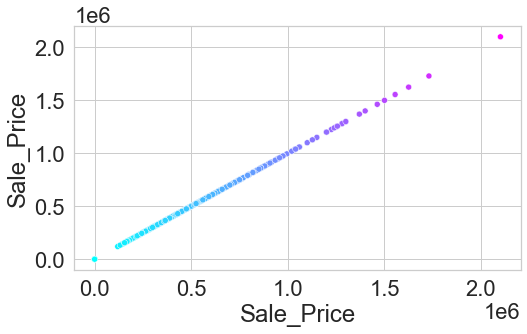

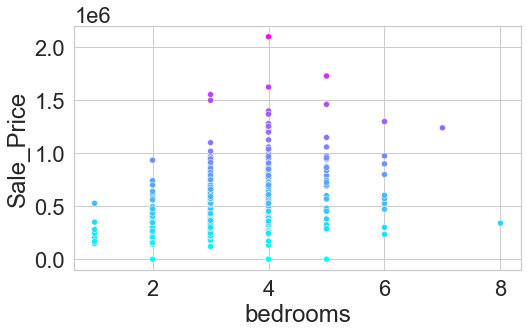

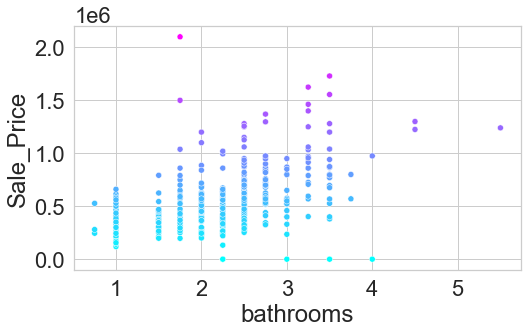

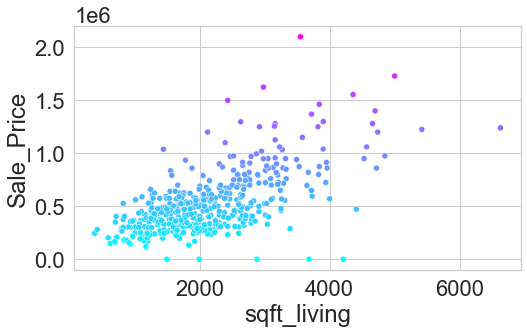

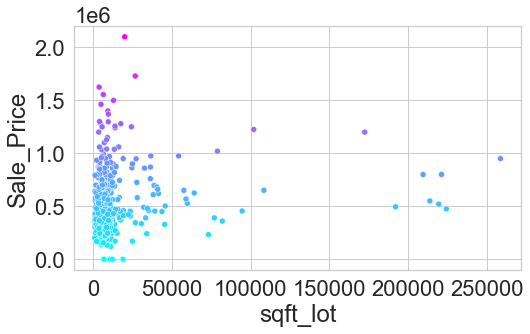

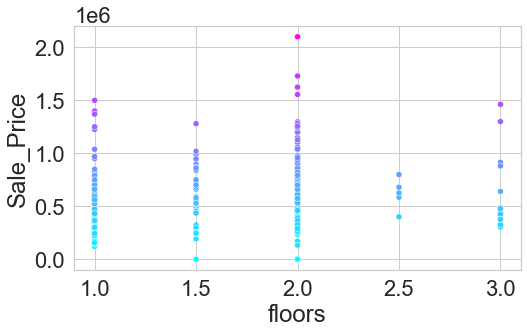

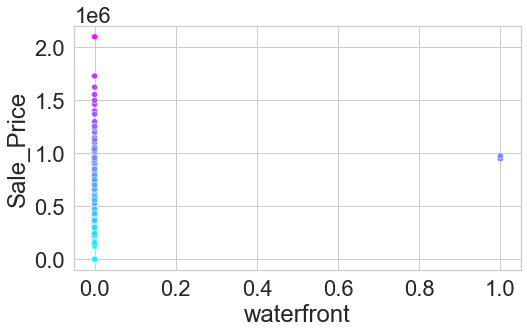

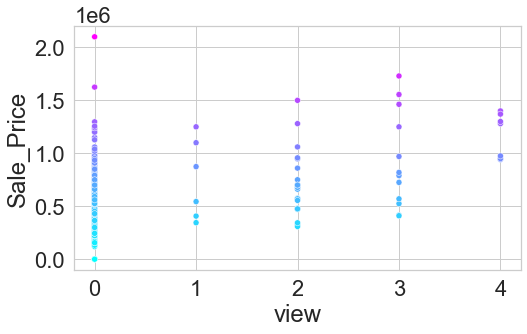

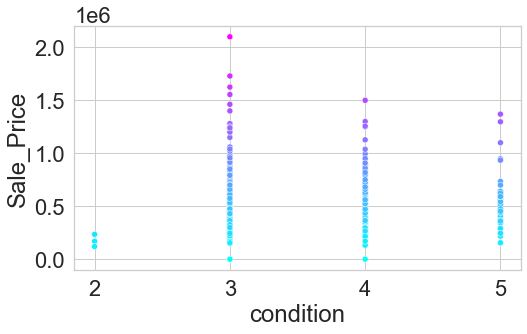

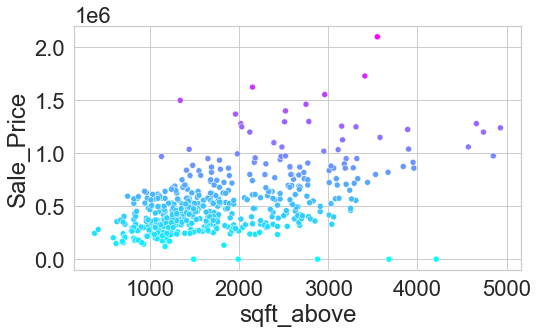

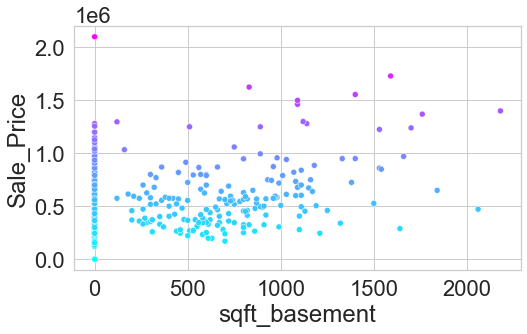

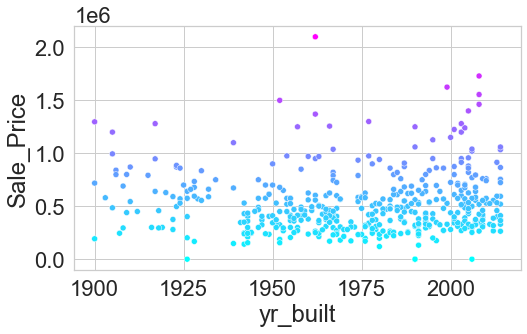

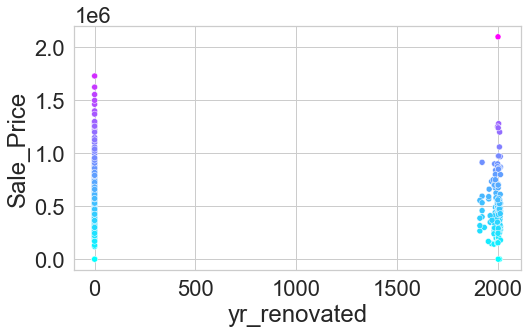

In [50]:
for features in features:
    plt.figure(figsize=(8,4.5))
    sns.scatterplot(data=sample_df, x=features, y='Sale_Price', hue='Sale_Price', palette='cool', legend=False)

17Oct2022 --- I should implement correlation Seaborn plot here, similar to what Kurt did in his MP#2


In [ ]:
# Plot pairwise relationships in a dataset
sns.pairplot(sample_df)

# Analyze

## 4. Machine learning model

### Split data for training and testing

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data_cont, price_series, random_state=72) # Input arguments are
# independent variables (features array) DataFrame, and the dependent variable (column array) Series

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [111]:
print(X_train.shape)
print(X_test.shape)

(3450, 12)
(1150, 12)


### Train the model

In [112]:
linear_regression = LinearRegression() # Create and set a new variable to Scikit-learn's 'LinearRegression' estimator
# By default the 'LinearRegression' estimator uses all features in the data array to perform multiple linear-regression.

# Invoke the 'fit' method to train the estimator
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [116]:
# Get regression summary
X2 = sm.add_constant(X_train) # Adds a column of ones to the array of features -- Why is this needed?
# "An intercept is not included by default and should be added by the user." ... Not convinced, come back to this...
# See: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

est = sm.OLS(y_train, X2) # ordinary least squares, to measure the spread in the data
est2 = est.fit() # fit model to data

# Print summary table
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     70.02
Date:                Tue, 24 May 2022   Prob (F-statistic):          4.08e-142
Time:                        14:16:53   Log-Likelihood:                -50547.
No. Observations:                3450   AIC:                         1.011e+05
Df Residuals:                    3438   BIC:                         1.012e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.275e+06   8.79e+05      4.864

In [117]:
# Continue here... Wow! That adj. r-square value is LOW!
# Wait, does the data need to be normalized? The data should be normalized to give an apples to apples 
# comparison of the coefficients.

To do:
1. I need to standardize the data. See: https://scikit-learn.org/stable/modules/preprocessing.html, 6.3.1
2. Compare the effect of different scalers on data with outliers. See: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py